<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Scikit---Fuzzy/blob/main/Scikit_Fuzzy_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# INSTALAR A BIBLIOTECA NO COLAB
!pip install scikit-fuzzy

In [ ]:
# IMPORTAR AS BIBLIOTECAS BASICAS
import numpy as np
import matplotlib.pyplot as plt

# BIBLIOTECAS FUZZY
import skfuzzy as fuzz
from skfuzzy import control

# PROCESSAMENTO

In [ ]:
# CRIAR UMA MATRIX ARRAY DE 0 A 21 NÚMEROS, DE 1 EM 1
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

### ESTRUTURA BÁSICA FUZZY

In [ ]:
# CRIAR DUAS VARIAVÉIS DIFERENTES TENDO A MESMA MATRIZ DE CIMA
dominio_fila = np.arange(0,21,1)
dominio_ext = np.arange(0,21,1)

In [ ]:
# CRIAR AS VARIÁVEIS FUZZY ANTECEDENTES
f1 = control.Antecedent(dominio_fila, 'f1')
f2 = control.Antecedent(dominio_fila, 'f2')
f3 = control.Antecedent(dominio_fila, 'f3')
f4 = control.Antecedent(dominio_fila, 'f4')

In [ ]:
# CRIAR A VARIÁVEL FUZZY CONCEQUENTE
ext = control.Consequent(dominio_ext, 'ext')

### CONJUNTO FUZZY

In [ ]:
# VARIÁVEL f1
# 'trimf' SIGNIFICA TRIÂNGULAR
# 'trapmf' SIGNIFICA TRAPEZIODAL
f1 ['pequeno'] = fuzz.trimf(f1.universe, [0,4,8])
f1 ['média'] = fuzz.trimf(f1.universe, [4,8,12])
f1 ['longa'] = fuzz.trapmf(f1.universe, [8,12,20,20])

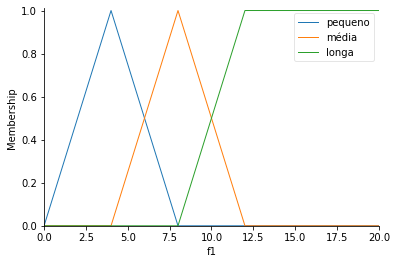

In [ ]:
# MOSTRAR GRÁFICO
f1.view()

In [ ]:
# VARIÁVEL f2
f2 ['pequeno'] = fuzz.trimf(f2.universe, [0,4,8])
f2 ['média'] = fuzz.trimf(f2.universe, [4,8,12])
f2 ['longa'] = fuzz.trapmf(f2.universe, [8,12,20,20])

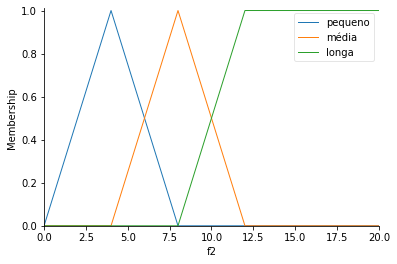

In [ ]:
# MOSTRAR GRÁFICO
f2.view()

In [ ]:
# VARIÁVEL f3
f3 ['pequeno'] = fuzz.trimf(f3.universe, [0,4,8])
f3 ['média'] = fuzz.trimf(f3.universe, [4,8,12])
f3 ['longa'] = fuzz.trapmf(f3.universe, [8,12,20,20])

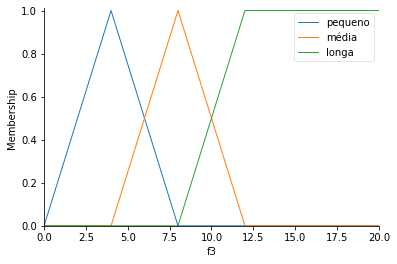

In [ ]:
# MOSTRAR GRÁFICO
f3.view()

In [ ]:
# VARIÁVEL f4
f4 ['pequeno'] = fuzz.trimf(f4.universe, [0,4,8])
f4 ['média'] = fuzz.trimf(f4.universe, [4,8,12])
f4 ['longa'] = fuzz.trapmf(f4.universe, [8,12,20,20])

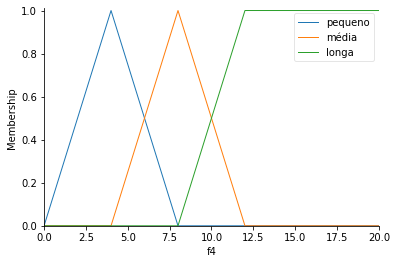

In [ ]:
# MOSTRAR GRÁFICO
f4.view()

In [ ]:
# VARIÁVEL extensão
ext ['zero'] = fuzz.trimf(ext.universe, [0,0,5])
ext ['curto'] = fuzz.trimf(ext.universe, [0,5,10])
ext ['média'] = fuzz.trimf(ext.universe, [5,10,15])
ext ['longa'] = fuzz.trapmf(ext.universe, [10,15,20,20])

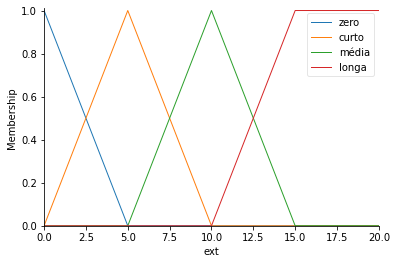

In [ ]:
# MOSTRAR GRÁFICO
ext.view()

## REGRAS

In [ ]:
# REGRAS
regra1 = control.Rule(f1['longa'] & f2['pequeno'], ext['longa'])
regra2 = control.Rule(f3['média'] | f4['pequeno'], ext['média'])
regra3 = control.Rule(f2['longa'] & f1['pequeno'], ext['zero'])

In [ ]:
# CRIAR UM CONTROLE DE REGRAS
controle = control.ControlSystem([regra1,regra2,regra3])

In [ ]:
# CRIAR UMA VARIÁVEL QUE VAI SIMULAR AS REGRAS DA VARIÁVEL 'controle'
sA = control.ControlSystemSimulation(controle)

In [ ]:
# CRIAR VALORES ALEATÓRIOS PARA UMA SIMULAÇÃO 
# OBS: ESSES VALORES SERÃO REPRESENTADOS POR SEGUNDOS, PARA EXEMPLIFICAR A RESEPRESNTAÇÃO DE UM SEMÁFARO
sA.input['f1'] = 10
sA.input['f2'] = 3
sA.input['f3'] = 0
sA.input['f4'] = 1

# CALCULAR
sA.compute()

In [ ]:
# RESULTADO
sA.output

OrderedDict([('ext', 13.926818014027317)])

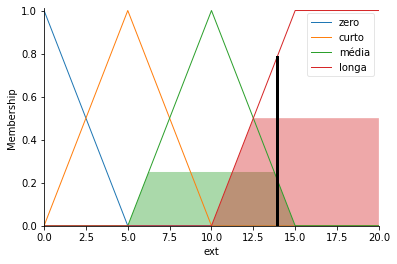

In [ ]:
# MOSTRAR GRÁFICO
# 'sim' SIGNIFICA SIMULAÇÃO
ext.view(sim=sA)